In [ ]:
pip install stellargraph

     |████████████████████████████████| 435 kB 5.3 MB/s 


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>
    
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


In [ ]:
from google.colab import files
files = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [ ]:
# hint: you can refer facebook case study notebook to solve this assignment in couple of hours
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])
print(data)

      movie  actor
0        m1     a1
1        m2     a1
2        m2     a2
3        m3     a1
4        m3     a3
...     ...    ...
9645  m1380   a816
9646  m1380   a962
9647  m1381  a1225
9648  m1381  a1436
9649  m1381  a1926

[9650 rows x 2 columns]


In [ ]:
edges = [tuple(x) for x in data.values.tolist()]
print(edges)

[('m1', 'a1'), ('m2', 'a1'), ('m2', 'a2'), ('m3', 'a1'), ('m3', 'a3'), ('m3', 'a4'), ('m3', 'a5'), ('m3', 'a6'), ('m3', 'a7'), ('m4', 'a1'), ('m4', 'a10'), ('m4', 'a8'), ('m4', 'a9'), ('m5', 'a1'), ('m5', 'a11'), ('m5', 'a12'), ('m5', 'a13'), ('m5', 'a14'), ('m5', 'a15'), ('m5', 'a16'), ('m5', 'a17'), ('m5', 'a18'), ('m5', 'a19'), ('m7', 'a21'), ('m7', 'a22'), ('m8', 'a22'), ('m9', 'a22'), ('m9', 'a23'), ('m10', 'a22'), ('m10', 'a24'), ('m10', 'a25'), ('m11', 'a22'), ('m11', 'a26'), ('m11', 'a27'), ('m11', 'a28'), ('m11', 'a29'), ('m24', 'a47'), ('m25', 'a47'), ('m25', 'a48'), ('m25', 'a49'), ('m25', 'a50'), ('m25', 'a51'), ('m25', 'a52'), ('m25', 'a53'), ('m25', 'a54'), ('m25', 'a55'), ('m25', 'a56'), ('m25', 'a57'), ('m25', 'a58'), ('m25', 'a59'), ('m25', 'a60'), ('m25', 'a61'), ('m25', 'a62'), ('m25', 'a63'), ('m25', 'a64'), ('m25', 'a65'), ('m25', 'a66'), ('m25', 'a67'), ('m25', 'a68'), ('m25', 'a69'), ('m25', 'a70'), ('m26', 'a47'), ('m26', 'a71'), ('m26', 'a72'), ('m26', 'a73'), 

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = nx.connected_components(B)
print(A)

<generator object connected_components at 0x7f6b8e4b2ed0>


In [ ]:
print("number of nodes", B.number_of_nodes())
print("number of edges", B.number_of_edges())

number of nodes 4703
number of edges 9650


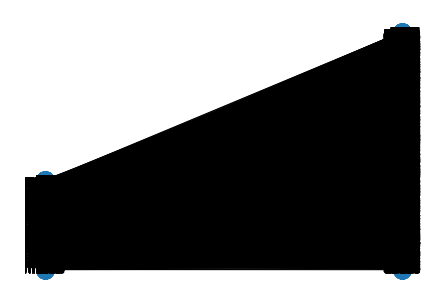

In [ ]:
l, r = nx.bipartite.sets(B)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in B.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:
#Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(B))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]



In [ ]:
walks = rw.run(nodes= list(B.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape     

(4703, 128)

In [ ]:
node_ids = model.wv.index2word  # list of node IDs
print(len(node_ids))
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ B.nodes()[node_id]['label'] for node_id in node_ids]
print(node_targets)

4703
['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor', 'movie', 'actor', 'movie', 'actor', 'actor', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor', 'actor', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'actor', 'actor', 'movie', 'actor', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'mov

In [ ]:
from networkx.generators.ego import ego_graph
from networkx import Graph
def create_graph(number_of_clusters , result):
    cost1,cost2 = 0, 0
    cost = []
    for i in range(number_of_clusters):
         cluster = result[result['cluster_ID']== i]
         node_indices = cluster.index

         edges = [tuple(x) for x in data.values[node_indices , :]]
         actors = [tuple(x)[1] for x in data.values[node_indices , :]]
         movies = [tuple(x)[0] for x in data.values[node_indices , :]]
         #print(edges)

         sub_graph = nx.Graph()
         sub_graph.add_nodes_from(set(movies), bipartite=0, label='movie')
         sub_graph.add_nodes_from(set(actors), bipartite=1, label='actor')
         sub_graph.add_edges_from(set(edges), label='acted')

         
         largest_cc = max(nx.connected_components(sub_graph), key=len)
         cost1 += (len(largest_cc)) / len(sub_graph.nodes())

         degree = [val for (node,val) in sub_graph.degree(set(movies))]
         cost2 += sum(degree) / len(set(movies))
      
    cost1 = cost1 /number_of_clusters 
    cost2 = cost2 / number_of_clusters
    cost.append(cost1*cost2)
    print(cost)


     

In [ ]:
from sklearn.cluster import KMeans
for number_of_clusters in [3, 5, 10, 30, 50, 100,200,500]:
     algo = KMeans(n_clusters=number_of_clusters) #  pass a matrix of size N*d where N number of actor nodes and d is dimension from gensim
     algo.fit(model.wv.vectors[0:1291 , ])

     #referred #https://stackoverflow.com/questions/35048263/how-to-retrieve-the-cluster-centroids-in-sic-kit-learns-k-means

     Y = pd.DataFrame(algo.predict(model.wv.vectors[0:1291 , ]),columns = ['cluster_ID'])
     result = pd.concat([pd.DataFrame(model.wv.vectors[0:1291 , ]), Y], axis=1)
     #print(result.shape)
     create_graph(number_of_clusters , result)


[0.855373632329285]
[0.26488382426340845]
[0.1667523931005986]
[0.1846845038344796]
[0.21350689513735133]
[0.332104222646133]
[0.5688417798267547]
[0.7715947319763219]


In [ ]:
from networkx.generators.ego import ego_graph
from networkx import Graph
def create_graph(number_of_clusters , result):
    cost1,cost2 = 0, 0
    cost = []
    for i in range(number_of_clusters):
         cluster = result[result['cluster_ID']== i]
         node_indices = cluster.index

         edges = [tuple(x) for x in data.values[node_indices , :]]
         actors = [tuple(x)[1] for x in data.values[node_indices , :]]
         movies = [tuple(x)[0] for x in data.values[node_indices , :]]
         #print(edges)

         sub_graph = nx.Graph()
         sub_graph.add_nodes_from(set(movies), bipartite=0, label='movie')
         sub_graph.add_nodes_from(set(actors), bipartite=1, label='actor')
         sub_graph.add_edges_from(set(edges), label='acted')

         
         largest_cc = max(nx.connected_components(sub_graph), key=len)
         cost1 += (len(largest_cc)) / len(sub_graph.nodes())

         degree = [val for (node,val) in sub_graph.degree(set(actors))]
         cost2 += sum(degree) / len(set(movies))
      
    cost1 = cost1 /number_of_clusters 
    cost2 = cost2 / number_of_clusters
    cost.append(cost1*cost2)
    print(cost)

In [ ]:
from sklearn.cluster import KMeans
for number_of_clusters in [3, 5, 10, 30, 50, 100,200,500]:
     algo = KMeans(n_clusters=number_of_clusters) # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
     algo.fit(model.wv.vectors[1292: , ])

     #referred #https://stackoverflow.com/questions/35048263/how-to-retrieve-the-cluster-centroids-in-sic-kit-learns-k-means

     Y = pd.DataFrame(algo.predict(model.wv.vectors[1292: , ]),columns = ['cluster_ID'])
     result = pd.concat([pd.DataFrame(model.wv.vectors[1292: , ]), Y], axis=1)
     #print(result.shape)
     create_graph(number_of_clusters , result)

[1.2247567469053513]
[0.6141248945719441]
[0.3188959226202066]
[0.1470553400593999]
[0.12635894629907574]
[0.13146079018967197]
[0.1956843669028407]
[0.457305900397252]


In [ ]:
best_no_of_clusters = 3
algo_movies = KMeans(n_clusters=best_no_of_clusters)
algo_movies.fit(model.wv.vectors[0:1291 , ])
print(algo_movies.predict(model.wv.vectors[0:1291 , ]))

[0 0 0 ... 0 2 2]


In [ ]:
best_no_of_clusters = 5
algo_actors = KMeans(n_clusters=best_no_of_clusters)
algo_actors.fit(model.wv.vectors[1292: , ])
print(algo_actors.predict(model.wv.vectors[1292: , ]))

[4 4 2 ... 1 1 1]


In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings[0:1291 ,])

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(algo_movies.predict(model.wv.vectors[0:1291 , ])))}
node_colours = [ label_map[target] for target in algo_movies.predict(model.wv.vectors[0:1291 , ])]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.6)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

NameError: ignored

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings[1292: ,])

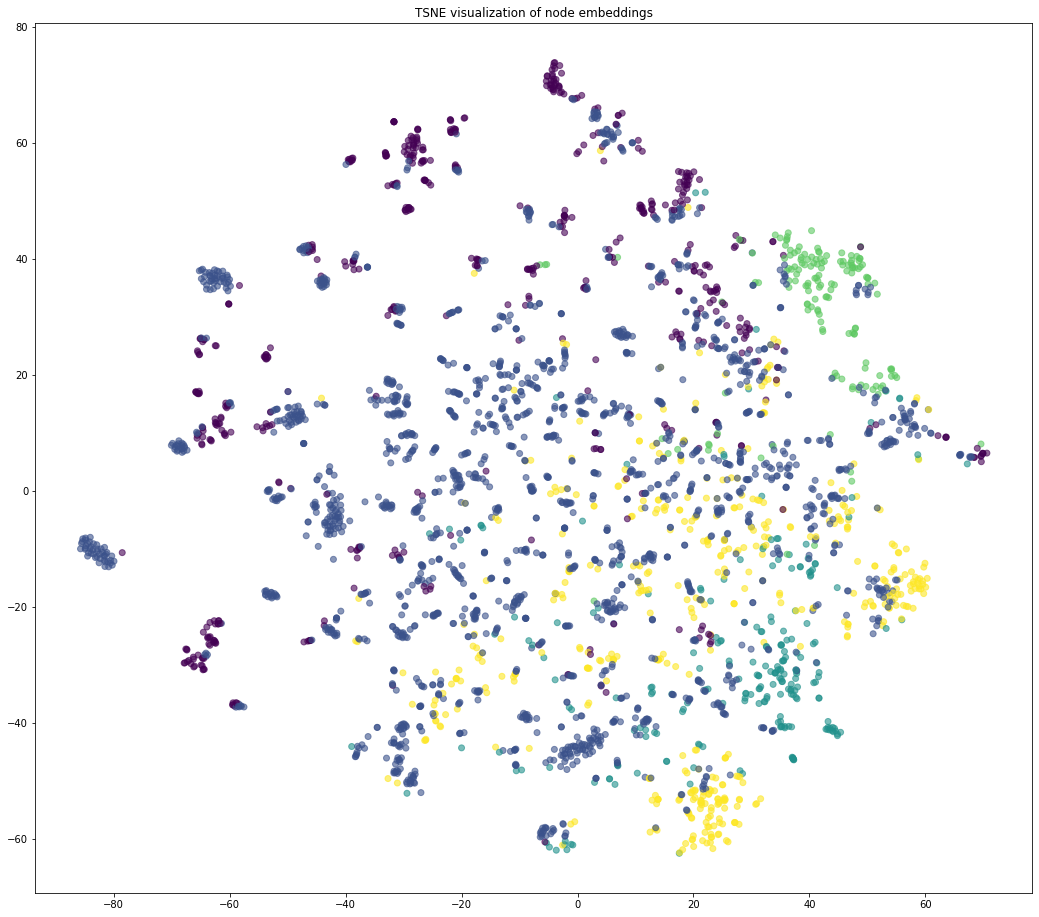

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(algo_actors.predict(model.wv.vectors[1292: , ])))}
node_colours = [ label_map[target] for target in algo_actors.predict(model.wv.vectors[1292: , ])]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1],
            c=node_colours, alpha=0.6)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()